In [50]:
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score

pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

###### Add new time related features and delete useless ones

In [58]:
data_v1 = pd.read_csv('data_v3_addtext.csv')

data_v1.created = data_v1.created.map(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
data_v1['created_iso_yr'] = data_v1.created.map(lambda x: x.date().isocalendar()[0])
data_v1['created_mo'] = data_v1.created.map(lambda x: x.date().month)
data_v1['created_mo_day'] = data_v1.created.map(lambda x: x.date().day)
data_v1['created_iso_wk'] = data_v1.created.map(lambda x: x.date().isocalendar()[1])
data_v1['date'] = data_v1.created.map(lambda x: x.date())

useless_cols = ['aid', 'bvid', 'created', 
                'follower', 'likes', 'play',
                'description', 'title', 'typeid',
                'top1','top2','top3',
                'top1_count', 'top2_count', 'top3_count','count_sum']

data_v1 = data_v1.drop(useless_cols, axis = 1)
data_v1

,美食,美食制作,生活,美食圈,日常,吃货,美食侦探,美食vlog,吃播,美食测评,搞笑,料理制作,厨艺,VLOG,制作教程,家常菜,美食视频,自制,生活记录,全能打卡挑战,daily,food,food_country,food_detect,food_eval,food_record,funny,author,comment,length,video_review,food_ratio,life_ratio,hour,day_time,weekday,is_weekend,last_3month_play,last_3month_count,log_play,similiar_desc淀粉,similiar_desc可爱,similiar_desc牛排,similiar_desc教程,similiar_desc陕西,similiar_desc发现,similiar_desc收藏,similiar_desc宝宝,similiar_desc酱汁,similiar_desc博主,similiar_desc不会,similiar_desc味道,similiar_desc视频,similiar_desc东西,similiar_desc排骨,similiar_desc粉丝,similiar_desc需要,similiar_desc奶茶,similiar_desc看看,similiar_desc城市,similiar_desc准备,similiar_desc方法,similiar_desc简单,similiar_desc小龙虾,similiar_desc简介,similiar_desc地址,similiar_desc黄油,similiar_desc广州,similiar_desc土豆,similiar_desc自制,similiar_desc素质,similiar_desc快乐,similiar_desc烤箱,similiar_desc全网,similiar_desc推荐,similiar_desc番茄,similiar_desc吃喝,similiar_desc下酒菜,similiar_desc已经,similiar_desc老板,similiar_desc加入,similiar_desc喜欢,similiar_desc口味,similiar_desc鸡翅,similiar_desc马蹄,similiar_desc倒入,similiar_desc炸鸡,similiar_desc觉得,similiar_desc下饭,similiar_desc块钱,similiar_desc一直,similiar_desc有点,similiar_desc小勺,similiar_desc小伙,similiar_desc传统,similiar_desc秘制,similiar_desc食材,similiar_desc招募,similiar_desc感觉,similiar_desc早餐,similiar_desc搭配,similiar_desc终于,similiar_desc欢迎,similiar_desc牛奶,similiar_desc小马,similiar_desc料酒,similiar_desc投币,similiar_desc啤酒,similiar_desc支持,similiar_desc料理,similiar_desc做成,similiar_desc鼓励,similiar_desc吃货,similiar_desc分享,similiar_desc美食,similiar_desc泡面,similiar_desc非常,similiar_desc真的,similiar_desc最大,similiar_desc不能,similiar_desc希望,similiar_desc不用,similiar_desc芝士,similiar_desc试吃,similiar_desc素材,similiar_desc测评,similiar_desc关注,similiar_desc兄弟,similiar_desc到底,similiar_desc其实,similiar_desc继续,similiar_desc米饭,similiar_desc专业,similiar_desc喝酒,similiar_desc面包,similiar_desc火锅,similiar_desc朋友,similiar_desc饭菜,similiar_desc面粉,similiar_desc起来,similiar_desc评论,similiar_desc蛋糕,similiar_desc蛋黄,similiar_desc家常,similiar_desc赶海,similiar_desc日常,similiar_desc鸡蛋,similiar_desc胡椒粉,similiar_desc牛肉,similiar_desc一期,similiar_desc奶油,similiar_desc放入,similiar_desc特别,similiar_desc一定,similiar_desc小吃,similiar_desc小时,similiar_desc比较,similiar_desc更新,similiar_desc频道,similiar_desc时间,similiar_desc小伙伴,similiar_desc白糖,similiar_desc吃饭,similiar_desc完整,similiar_desc动力,similiar_desc感谢,similiar_desc做法,similiar_desc知道,similiar_desc好吃,similiar_desc厨房,similiar_desc过瘾,similiar_desc点赞,similiar_desc配料,similiar_desc配方,similiar_desc口感,similiar_desc公众,similiar_desc适量,similiar_desc软软,similiar_desc餐厅,similiar_desc中国,similiar_desc拍摄,similiar_desc烧烤,similiar_desc海鲜,similiar_desc外卖,similiar_desc洋葱,similiar_title神仙,similiar_title牛排,similiar_title披萨,similiar_title陕西,similiar_title发现,similiar_title收藏,similiar_title英国,similiar_title不会,similiar_title味道,similiar_title视频,similiar_title排骨,similiar_title小哥,similiar_title粉丝,similiar_title鸡腿,similiar_title厨师长,similiar_title简单,similiar_title小龙虾,similiar_title开箱,similiar_title广州,similiar_title学会,similiar_title甜品,similiar_title土豆,similiar_title做出,similiar_title汉堡,similiar_title浓郁,similiar_title拉面,similiar_title自制,similiar_title米其林,similiar_title快乐,similiar_title全网,similiar_title零食,similiar_title番茄,similiar_title肥牛,similiar_title脆皮,similiar_title居然,similiar_title老板,similiar_title网红,similiar_title喜欢,similiar_title口味,similiar_title鸡翅,similiar_title开胃,similiar_title原来,similiar_title炸鸡,similiar_title品城,similiar_title治愈,similiar_title下饭,similiar_title块钱,similiar_title完美,similiar_title成功,similiar_title小伙,similiar_title传统,similiar_title吐司,similiar_title秘制,similiar_title食材,similiar_title感觉,similiar_title螺蛳,similiar_title早餐,similiar_title搭配,similiar_title五花肉,similiar_title终于,similiar_title牛奶,similiar_title烤肉,similiar_title体验,similiar_title料理,similiar_title做成,similiar_title吃货,similiar_title分享,similiar_title美食,similiar_title韩式,similiar_title泡面,similiar_title真的,similiar_title复刻,similiar_title鲜嫩,similiar_title可乐,similiar_title日本,similiar_title不用,similiar_title芝士,similiar_title吃法,similiar_title测评,similiar_title试吃,similiar_title兄弟,similiar_t

###### Split Train & Test

In [43]:
# set the parameter for time cutoff
cut_off_date = datetime.strptime('2020-08-15', '%Y-%m-%d').date()
test_idx = data_v1.date > cut_off_date
print('testing percentage:{:.3f}'.format((test_idx).sum() / len(data_v1.date)))

data_v1.drop('date', axis = 1, inplace = True)

testing percentage:0.177


In [45]:
# number of training & testing dataset
train_df_v1 = data_v1[test_idx == False]
test_df_v1 = data_v1[test_idx == True]

print('training dataset: {} records'.format(train_df_v1.shape[0]))
print('testing dataset: {} records'.format(test_df_v1.shape[0]))
print('number of features: {}'.format(train_df_v1.shape[1]-2))

training dataset: 12644 records
testing dataset: 2728 records
number of features: 312


In [61]:
train_X_v1 = train_df_v1.drop('log_play', axis=1)
train_y_v1 = train_df_v1.log_play
test_X_v1 = test_df_v1.drop('log_play', axis=1)
test_y_v1 = test_df_v1.log_play

##### Baseline

In [54]:
# get the average 'last_3month_play' based on 'author'
mean_play = pd.DataFrame(test_df_v1.groupby(['author']).mean()['last_3month_play'])
mean_play

,last_3month_play
author,
1小点的厨房,2.416198e+04
80手残哥,3.764375e+03
Amoy硬邦帮,1.547292e+05
Amy艾米饭,1.426987e+05
Anna智贤,8.227143e+04
...,...
马蹄厨房,2.712471e+05
麟宣森,9.096504e+05
麻烦摩摩叩,4.606648e+05


In [200]:
# filter out authors whose average 'last_3month_play' are zero
zero_author = mean_play.loc[mean_play.last_3month_play == 0]
zero_author

# these records will result in a '-inf' value after the np.log() transformation
# we will fill these values with one in the following step

,last_3month_play
author,
东尼ookii,0.0
吮指美食姬,0.0
山下智博,0.0
林述巍JACKLIN,0.0
演员管云鹏,0.0
雪茸堂小马吃草,0.0
非著名收藏家,0.0


In [212]:
# make baseline prediction by average of 'last_3month_play' based on 'author'
base_df = test_df_v1.merge(mean_play, on='author', how='left')
base_df.loc[base_df.author.isin(list(zero_author.index)), 'last_3month_play_y'] = 1 # set np.log(1)=0
base_pred = base_df['last_3month_play_y']

In [215]:
# MSE & R^2 for baseline
print('MSE for baseline: {}'.format(mean_squared_error(test_y_v1, np.log(base_pred))))
print('R^2 for baseline: {}'.format(r2_score(test_y_v1, np.log(base_pred))))

MSE for baseline: 2.5993174585409524
R^2 for baseline: 0.42570427415736123


In [105]:
# ## Appendix: Comparison of Baseline & Lasso for feature selection
# lasso = linear_model.Lasso(alpha=16).fit(train_X_v1, train_y_v1)
# lasso_pred = lasso.predict(test_X_v1)

# print('MSE: {}'.format(mean_squared_error(test_y_v1, lasso_pred)))
# print('R^2: {}'.format(lasso.score(test_X_v1, test_y_v1)))

# coefs = lasso.coef_
# features = train_X_v1.columns
# coef_df = pd.DataFrame(coefs, features, columns=['coefficient'])
# coef_df[(coef_df != 0).any(axis=1)]

MSE: 3.2118913311315067
R^2: 0.290361607321622


,coefficient
comment,0.000167
length,0.000918
last_3month_play,0.000002


##### Final Version of Dataset

In [15]:
data = pd.read_csv('data_v4_addtext.csv', index_col=0)
data

,美食,美食制作,生活,美食圈,日常,吃货,美食侦探,美食vlog,吃播,美食测评,搞笑,料理制作,厨艺,VLOG,制作教程,家常菜,美食视频,自制,生活记录,全能打卡挑战,daily,food,food_country,food_detect,food_eval,food_record,funny,length,food_ratio,life_ratio,hour,day_time,weekday,is_weekend,last_3month_play,last_3month_count,log_play,similiar_desc淀粉,similiar_desc可爱,similiar_desc牛排,similiar_desc教程,similiar_desc陕西,similiar_desc发现,similiar_desc收藏,similiar_desc宝宝,similiar_desc酱汁,similiar_desc博主,similiar_desc不会,similiar_desc味道,similiar_desc视频,similiar_desc东西,similiar_desc排骨,similiar_desc粉丝,similiar_desc需要,similiar_desc奶茶,similiar_desc看看,similiar_desc城市,similiar_desc准备,similiar_desc方法,similiar_desc简单,similiar_desc小龙虾,similiar_desc简介,similiar_desc地址,similiar_desc黄油,similiar_desc广州,similiar_desc土豆,similiar_desc自制,similiar_desc素质,similiar_desc快乐,similiar_desc烤箱,similiar_desc全网,similiar_desc推荐,similiar_desc番茄,similiar_desc吃喝,similiar_desc下酒菜,similiar_desc已经,similiar_desc老板,similiar_desc加入,similiar_desc喜欢,similiar_desc口味,similiar_desc鸡翅,similiar_desc马蹄,similiar_desc倒入,similiar_desc炸鸡,similiar_desc觉得,similiar_desc下饭,similiar_desc块钱,similiar_desc一直,similiar_desc有点,similiar_desc小勺,similiar_desc小伙,similiar_desc传统,similiar_desc秘制,similiar_desc食材,similiar_desc招募,similiar_desc感觉,similiar_desc早餐,similiar_desc搭配,similiar_desc终于,similiar_desc欢迎,similiar_desc牛奶,similiar_desc小马,similiar_desc料酒,similiar_desc投币,similiar_desc啤酒,similiar_desc支持,similiar_desc料理,similiar_desc做成,similiar_desc鼓励,similiar_desc吃货,similiar_desc分享,similiar_desc美食,similiar_desc泡面,similiar_desc非常,similiar_desc真的,similiar_desc最大,similiar_desc不能,similiar_desc希望,similiar_desc不用,similiar_desc芝士,similiar_desc试吃,similiar_desc素材,similiar_desc测评,similiar_desc关注,similiar_desc兄弟,similiar_desc到底,similiar_desc其实,similiar_desc继续,similiar_desc米饭,similiar_desc专业,similiar_desc喝酒,similiar_desc面包,similiar_desc火锅,similiar_desc朋友,similiar_desc饭菜,similiar_desc面粉,similiar_desc起来,similiar_desc评论,similiar_desc蛋糕,similiar_desc蛋黄,similiar_desc家常,similiar_desc赶海,similiar_desc日常,similiar_desc鸡蛋,similiar_desc胡椒粉,similiar_desc牛肉,similiar_desc一期,similiar_desc奶油,similiar_desc放入,similiar_desc特别,similiar_desc一定,similiar_desc小吃,similiar_desc小时,similiar_desc比较,similiar_desc更新,similiar_desc频道,similiar_desc时间,similiar_desc小伙伴,similiar_desc白糖,similiar_desc吃饭,similiar_desc完整,similiar_desc动力,similiar_desc感谢,similiar_desc做法,similiar_desc知道,similiar_desc好吃,similiar_desc厨房,similiar_desc过瘾,similiar_desc点赞,similiar_desc配料,similiar_desc配方,similiar_desc口感,similiar_desc公众,similiar_desc适量,similiar_desc软软,similiar_desc餐厅,similiar_desc中国,similiar_desc拍摄,similiar_desc烧烤,similiar_desc海鲜,similiar_desc外卖,similiar_desc洋葱,similiar_title神仙,similiar_title牛排,similiar_title披萨,similiar_title陕西,similiar_title发现,similiar_title收藏,similiar_title英国,similiar_title不会,similiar_title味道,similiar_title视频,similiar_title排骨,similiar_title小哥,similiar_title粉丝,similiar_title鸡腿,similiar_title厨师长,similiar_title简单,similiar_title小龙虾,similiar_title开箱,similiar_title广州,similiar_title学会,similiar_title甜品,similiar_title土豆,similiar_title做出,similiar_title汉堡,similiar_title浓郁,similiar_title拉面,similiar_title自制,similiar_title米其林,similiar_title快乐,similiar_title全网,similiar_title零食,similiar_title番茄,similiar_title肥牛,similiar_title脆皮,similiar_title居然,similiar_title老板,similiar_title网红,similiar_title喜欢,similiar_title口味,similiar_title鸡翅,similiar_title开胃,similiar_title原来,similiar_title炸鸡,similiar_title品城,similiar_title治愈,similiar_title下饭,similiar_title块钱,similiar_title完美,similiar_title成功,similiar_title小伙,similiar_title传统,similiar_title吐司,similiar_title秘制,similiar_title食材,similiar_title感觉,similiar_title螺蛳,similiar_title早餐,similiar_title搭配,similiar_title五花肉,similiar_title终于,similiar_title牛奶,similiar_title烤肉,similiar_title体验,similiar_title料理,similiar_title做成,similiar_title吃货,similiar_title分享,similiar_title美食,similiar_title韩式,similiar_title泡面,similiar_title真的,similiar_title复刻,similiar_title鲜嫩,similiar_title可乐,similiar_title日本,similiar_title不用,similiar_title芝士,similiar_title吃法,similiar_title测评,similiar_title试吃,similiar_title兄弟,similiar_title到底,similiar_title还原,simi

###### Split Train, Valid, and Test

In [16]:
# set the parameter for time cutoff
data['date'] = data.date.map(lambda x: datetime.strptime(x, '%Y-%m-%d').date())

cut_off_date = datetime.strptime('2020-08-15', '%Y-%m-%d').date()
test_idx = data.date > cut_off_date
print('testing percentage:{:.3f}'.format((test_idx).sum() / len(data.date)))

cut_off_date_valid = datetime.strptime('2020-07-15', '%Y-%m-%d').date()
valid_idx = (data.date <= cut_off_date) & (data.date > cut_off_date_valid)
print('validation percentage:{:.3f}'.format((valid_idx).sum() / len(data.date)))

data.drop('date', axis = 1, inplace = True)

testing percentage:0.180
validation percentage:0.160


In [19]:
# number of training, validation & testing dataset
train_df = data[(test_idx == False) & (valid_idx == False)]
valid_df = data[valid_idx == True]
test_df = data[test_idx == True]
train_valid_df = data[test_idx == False]

print('training dataset: {} records'.format(train_df.shape[0]))
print('validation dataset: {} records'.format(valid_df.shape[0]))
print('testing dataset: {} records'.format(test_df.shape[0]))
print('number of features: {}'.format(train_df.shape[1]-1))

training dataset: 9787 records
validation dataset: 2370 records
testing dataset: 2663 records
number of features: 310


In [20]:
# split of X & y
train_X = train_df.drop('log_play', axis=1)
train_y = train_df.log_play

valid_X = valid_df.drop('log_play', axis=1)
valid_y = valid_df.log_play

test_X = test_df.drop('log_play', axis=1)
test_y = test_df.log_play

train_valid_X = train_valid_df.drop('log_play', axis=1)
train_valid_y = train_valid_df.log_play

##### Modeling
##### Linear Regression

In [49]:
# Linear Regression
lr = LinearRegression().fit(train_valid_X, train_valid_y)
lr_pred = lr.predict(test_X)

print('MSE for Linear Regression: {:.5f}'.format(mean_squared_error(test_y, lr_pred)))
print('R^2 for Linear Regression: {:.5f}'.format(lr.score(test_X, test_y)))

MSE for Linear Regression: 2.41856
R^2 for Linear Regression: 0.46919


MSE for best lr: 2.41856
R^2 for best lr: 0.46919


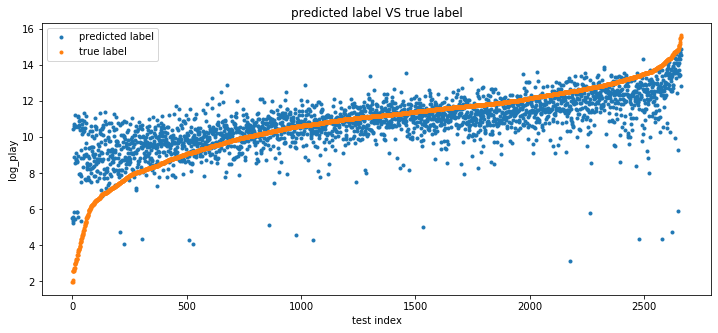

In [123]:
# Testing of Linear Regression
lr_best = LinearRegression().fit(train_valid_X, train_valid_y)
lr_pred = lr_best.predict(test_X)

print('MSE for best lr: {:.5f}'.format(mean_squared_error(test_y, lr_pred)))
print('R^2 for best lr: {:.5f}'.format(lr_best.score(test_X, test_y)))

def plot_test(model):
    model.fit(train_valid_X, train_valid_y)
    y_test_hat = pd.Series(model.predict(test_X), index = test_y.index)
    test_idx = test_y.argsort()
    
    fig, ax = plt.subplots(figsize = (12, 5))
    plt.plot(y_test_hat.iloc[test_idx].values,'.', label='predicted label')
    plt.plot(test_y.iloc[test_idx].values,'.', label='true label')
    plt.title('predicted label VS true label')
    plt.xlabel('test index')
    plt.ylabel('log_play')
    plt.legend()
    plt.show()

plot_test(LinearRegression())

In [140]:
# find top 10 positive and negative features with non-zero coefficient based on Linear Regression
coefs = lr_best.coef_
features = train_valid_X.columns
coef_df = pd.DataFrame(coefs, features, columns=['coefficient'])
coef_df[(coef_df != 0).any(axis=1)]
# coef_df[(coef_df != 0).any(axis=1)].to_csv('lr_coef.csv')

imp_coef = pd.concat([coef_df.sort_values(by='coefficient').head(10), coef_df.sort_values(by='coefficient').tail(10)])
imp_coef

,coefficient
similiar_desc下酒菜,-1.859886e+00
similiar_title品城,-1.494209e+00
similiar_title日常,-1.439610e+00
similiar_desc料酒,-1.249670e+00
similiar_desc厨房,-1.159930e+00
similiar_desc配料,-1.123893e+00
similiar_desc吃饭,-1.084731e+00
similiar_desc早餐,-1.028139e+00
similiar_desc小吃,-9.342703e-01
similiar_desc不会,-9.047567e-01


In [23]:
## Appendix: Cross Validation for Linear Regression
kf = KFold(n_splits=5)
X = train_valid_df.drop('log_play', axis=1).reset_index(drop=True)
y = train_valid_df.log_play.reset_index(drop=True)

for i, index in enumerate(kf.split(train_valid_df)):
    print('Fold: ', i+1)
    train_index, valid_index = index[0], index[1]
    X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
    lr = LinearRegression().fit(X_train, y_train)
    lr_pred = lr.predict(X_valid)

    print('MSE: {:.5f}'.format(mean_squared_error(y_valid, lr_pred)))
    print('R^2: {:.5f}'.format(lr.score(X_valid, y_valid)))

Fold:  1
MSE: 2.64358
R^2: 0.37138
Fold:  2
MSE: 2.46197
R^2: 0.48812
Fold:  3
MSE: 2.65076
R^2: 0.53334
Fold:  4
MSE: 2.05900
R^2: 0.42846
Fold:  5
MSE: 2.62451
R^2: 0.41277


##### Ridge

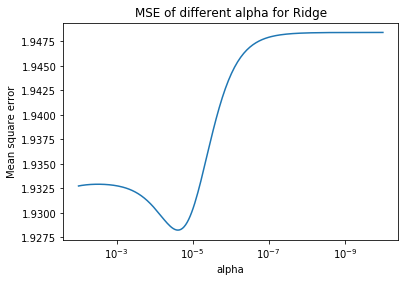

Minimum MSE: 1.92825
Best alpha: 0.00002


In [113]:
# Fine Tuning of alpha for Ridge
n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

mse_list = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(train_X, train_y)
    ridge_pred = ridge.predict(valid_X)
    mse = mean_squared_error(valid_y, ridge_pred)
    mse_list.append(mse)

ax = plt.gca()
ax.plot(alphas, mse_list)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('Mean square error')
plt.title('MSE of different alpha for Ridge')
plt.axis('tight')
plt.show();

# get best alpha based on MSE
print('Minimum MSE: {:.5f}'.format(np.array(mse_list).min()))
print('Best alpha: {:.5f}'.format(alphas[np.argmin(mse_list)]))

MSE for best Ridge: 2.41854
R^2 for best Ridge: 0.46920


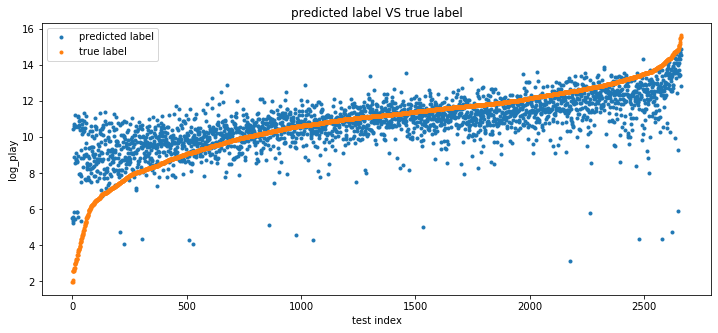

In [124]:
# Testing of Ridge
ridge_best = Ridge(alpha=0.00002).fit(train_valid_X, train_valid_y)
ridge_pred = ridge_best.predict(test_X)

print('MSE for best Ridge: {:.5f}'.format(mean_squared_error(test_y, ridge_pred)))
print('R^2 for best Ridge: {:.5f}'.format(ridge_best.score(test_X, test_y)))

plot_test(ridge_best)

In [139]:
# find top 10 positive and negative features with non-zero coefficient based on Ridge
coefs = ridge_best.coef_
features = train_valid_X.columns
coef_df = pd.DataFrame(coefs, features, columns=['coefficient'])
coef_df[(coef_df != 0).any(axis=1)]
# coef_df[(coef_df != 0).any(axis=1)].to_csv('ridge_coef.csv')

imp_coef = pd.concat([coef_df.sort_values(by='coefficient').head(10), coef_df.sort_values(by='coefficient').tail(10)])
imp_coef

,coefficient
similiar_desc下酒菜,-1.859886
similiar_title品城,-1.494205
similiar_title日常,-1.439606
similiar_desc料酒,-1.249690
similiar_desc厨房,-1.159957
similiar_desc配料,-1.123884
similiar_desc吃饭,-1.084719
similiar_desc早餐,-1.028135
similiar_desc小吃,-0.934303
similiar_desc不会,-0.904784


In [117]:
## Appendix: Cross Validation for Ridge
n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

ridge_cv = RidgeCV(cv=5, alphas=alphas, fit_intercept=True).fit(train_valid_X, train_valid_y)
ridge_cv_pred = ridge_cv.predict(test_X)

print('MSE for Ridge with cross validation: {:.5f}'.format(mean_squared_error(test_y, ridge_cv_pred)))
print('R^2 for Ridge with cross validation: {:.5f}'.format(ridge_cv.score(test_X, test_y)))
print('Best alpha for Ridge with cross validation: {}'.format(ridge_cv.alpha_))

MSE for Ridge with cross validation: 2.41841
R^2 for Ridge with cross validation: 0.46923
Best alpha for Ridge with cross validation: 0.01


##### Lasso

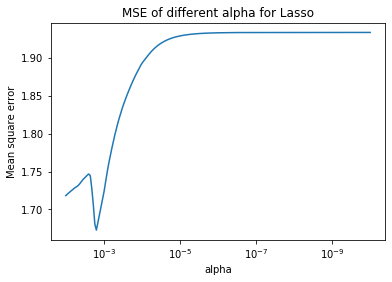

Minimum MSE: 1.67284
Best alpha: 0.00157


In [118]:
# Fine Tuning of alpha for Lasso
n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

mse_list = []
for a in alphas:
    lasso = linear_model.Lasso(alpha=a, fit_intercept=False)
    lasso.fit(train_X, train_y)
    lasso_pred = lasso.predict(valid_X)
    mse = mean_squared_error(valid_y, lasso_pred)
    mse_list.append(mse)

ax = plt.gca()
ax.plot(alphas, mse_list)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('Mean square error')
plt.title('MSE of different alpha for Lasso')
plt.axis('tight')
plt.show();

# get best alpha based on MSE
print('Minimum MSE: {:.5f}'.format(np.array(mse_list).min()))
print('Best alpha: {:.5f}'.format(alphas[np.argmin(mse_list)]))

MSE for best Lasso: 2.38414
R^2 for best Lasso: 0.47675


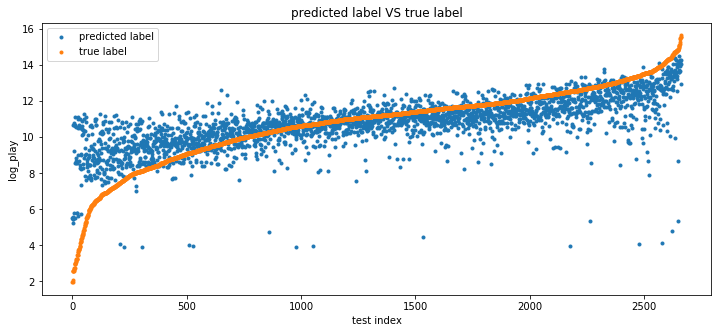

In [125]:
# Testing of Lasso
lasso_best = linear_model.Lasso(alpha=0.00157).fit(train_valid_X, train_valid_y)
lasso_pred = lasso_best.predict(test_X)

print('MSE for best Lasso: {:.5f}'.format(mean_squared_error(test_y, lasso_pred)))
print('R^2 for best Lasso: {:.5f}'.format(lasso_best.score(test_X, test_y)))

plot_test(lasso_best)

In [138]:
# find top 10 positive and negative features with non-zero coefficient based on Lasso
coefs = lasso_best.coef_
features = train_valid_X.columns
coef_df = pd.DataFrame(coefs, features, columns=['coefficient'])
coef_df[(coef_df != 0).any(axis=1)]
# coef_df[(coef_df != 0).any(axis=1)].to_csv('lasso_coef.csv')

imp_coef = pd.concat([coef_df.sort_values(by='coefficient').head(10), 
                      coef_df.sort_values(by='coefficient').tail(10)])
imp_coef

# plt.rcParams['figure.figsize'] = (8.0, 10.0)
# imp_coef.plot(kind = "barh")
# plt.title("Coefficients in the Lasso Model");

,coefficient
similiar_title日常,-0.867679
similiar_title小吃,-0.672192
similiar_desc配料,-0.500623
similiar_desc吃饭,-0.480587
created_iso_yr,-0.441185
similiar_desc最大,-0.413680
similiar_desc陕西,-0.354118
similiar_desc早餐,-0.287556
similiar_desc搭配,-0.221268
similiar_desc欢迎,-0.220581


MSE for Lasso with cross validation: 2.35912
R^2 for Lasso with cross validation: 0.48224
Best alpha for Lasso with cross validation: 0.01


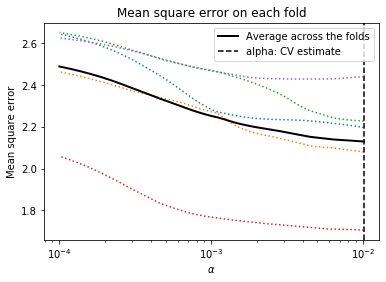

In [127]:
## Appendix: Cross Validation for Lasso
n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

lasso_cv = LassoCV(cv=5, alphas=alphas, 
                   fit_intercept=True, random_state=0).fit(train_valid_X, train_valid_y)
lasso_cv_pred = lasso_cv.predict(test_X)

print('MSE for Lasso with cross validation: {:.5f}'.format(mean_squared_error(test_y, lasso_cv_pred)))
print('R^2 for Lasso with cross validation: {:.5f}'.format(lasso_cv.score(test_X, test_y)))
print('Best alpha for Lasso with cross validation: {}'.format(lasso_cv.alpha_))

# Visualization for LassoCV
EPSILON = 1e-4

plt.figure()
plt.semilogx(lasso_cv.alphas_ + EPSILON, lasso_cv.mse_path_, ':')
plt.plot(lasso_cv.alphas_ + EPSILON, lasso_cv.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(lasso_cv.alpha_ + EPSILON, linestyle='--', color='k',
            label='alpha: CV estimate')

plt.legend()
plt.xlabel(r'$\alpha$')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold')
plt.axis('tight');

### Appendix: additional dataset with new target variable (play / 12-month average play)
##### [abandoned]

In [114]:
# revised data_v2 read directly from final.csv
data = pd.read_csv('final.csv', index_col=0)
data.date = data.date.map(lambda x: datetime.strptime(x, '%Y-%m-%d').date())
data

,美食,美食制作,生活,美食圈,日常,吃货,美食侦探,美食vlog,吃播,美食测评,搞笑,料理制作,厨艺,VLOG,制作教程,家常菜,美食视频,自制,生活记录,全能打卡挑战,daily,food,food_country,food_detect,food_eval,food_record,funny,length,food_ratio,life_ratio,hour,day_time,weekday,is_weekend,last_3month_play,last_3month_count,similiar_desc淀粉,similiar_desc可爱,similiar_desc牛排,similiar_desc教程,similiar_desc陕西,similiar_desc发现,similiar_desc收藏,similiar_desc宝宝,similiar_desc酱汁,similiar_desc博主,similiar_desc不会,similiar_desc味道,similiar_desc视频,similiar_desc东西,similiar_desc排骨,similiar_desc粉丝,similiar_desc需要,similiar_desc奶茶,similiar_desc看看,similiar_desc城市,similiar_desc准备,similiar_desc方法,similiar_desc简单,similiar_desc小龙虾,similiar_desc简介,similiar_desc地址,similiar_desc黄油,similiar_desc广州,similiar_desc土豆,similiar_desc自制,similiar_desc素质,similiar_desc快乐,similiar_desc烤箱,similiar_desc全网,similiar_desc推荐,similiar_desc番茄,similiar_desc吃喝,similiar_desc下酒菜,similiar_desc已经,similiar_desc老板,similiar_desc加入,similiar_desc喜欢,similiar_desc口味,similiar_desc鸡翅,similiar_desc马蹄,similiar_desc倒入,similiar_desc炸鸡,similiar_desc觉得,similiar_desc下饭,similiar_desc块钱,similiar_desc一直,similiar_desc有点,similiar_desc小勺,similiar_desc小伙,similiar_desc传统,similiar_desc秘制,similiar_desc食材,similiar_desc招募,similiar_desc感觉,similiar_desc早餐,similiar_desc搭配,similiar_desc终于,similiar_desc欢迎,similiar_desc牛奶,similiar_desc小马,similiar_desc料酒,similiar_desc投币,similiar_desc啤酒,similiar_desc支持,similiar_desc料理,similiar_desc做成,similiar_desc鼓励,similiar_desc吃货,similiar_desc分享,similiar_desc美食,similiar_desc泡面,similiar_desc非常,similiar_desc真的,similiar_desc最大,similiar_desc不能,similiar_desc希望,similiar_desc不用,similiar_desc芝士,similiar_desc试吃,similiar_desc素材,similiar_desc测评,similiar_desc关注,similiar_desc兄弟,similiar_desc到底,similiar_desc其实,similiar_desc继续,similiar_desc米饭,similiar_desc专业,similiar_desc喝酒,similiar_desc面包,similiar_desc火锅,similiar_desc朋友,similiar_desc饭菜,similiar_desc面粉,similiar_desc起来,similiar_desc评论,similiar_desc蛋糕,similiar_desc蛋黄,similiar_desc家常,similiar_desc赶海,similiar_desc日常,similiar_desc鸡蛋,similiar_desc胡椒粉,similiar_desc牛肉,similiar_desc一期,similiar_desc奶油,similiar_desc放入,similiar_desc特别,similiar_desc一定,similiar_desc小吃,similiar_desc小时,similiar_desc比较,similiar_desc更新,similiar_desc频道,similiar_desc时间,similiar_desc小伙伴,similiar_desc白糖,similiar_desc吃饭,similiar_desc完整,similiar_desc动力,similiar_desc感谢,similiar_desc做法,similiar_desc知道,similiar_desc好吃,similiar_desc厨房,similiar_desc过瘾,similiar_desc点赞,similiar_desc配料,similiar_desc配方,similiar_desc口感,similiar_desc公众,similiar_desc适量,similiar_desc软软,similiar_desc餐厅,similiar_desc中国,similiar_desc拍摄,similiar_desc烧烤,similiar_desc海鲜,similiar_desc外卖,similiar_desc洋葱,similiar_title神仙,similiar_title牛排,similiar_title披萨,similiar_title陕西,similiar_title发现,similiar_title收藏,similiar_title英国,similiar_title不会,similiar_title味道,similiar_title视频,similiar_title排骨,similiar_title小哥,similiar_title粉丝,similiar_title鸡腿,similiar_title厨师长,similiar_title简单,similiar_title小龙虾,similiar_title开箱,similiar_title广州,similiar_title学会,similiar_title甜品,similiar_title土豆,similiar_title做出,similiar_title汉堡,similiar_title浓郁,similiar_title拉面,similiar_title自制,similiar_title米其林,similiar_title快乐,similiar_title全网,similiar_title零食,similiar_title番茄,similiar_title肥牛,similiar_title脆皮,similiar_title居然,similiar_title老板,similiar_title网红,similiar_title喜欢,similiar_title口味,similiar_title鸡翅,similiar_title开胃,similiar_title原来,similiar_title炸鸡,similiar_title品城,similiar_title治愈,similiar_title下饭,similiar_title块钱,similiar_title完美,similiar_title成功,similiar_title小伙,similiar_title传统,similiar_title吐司,similiar_title秘制,similiar_title食材,similiar_title感觉,similiar_title螺蛳,similiar_title早餐,similiar_title搭配,similiar_title五花肉,similiar_title终于,similiar_title牛奶,similiar_title烤肉,similiar_title体验,similiar_title料理,similiar_title做成,similiar_title吃货,similiar_title分享,similiar_title美食,similiar_title韩式,similiar_title泡面,similiar_title真的,similiar_title复刻,similiar_title鲜嫩,similiar_title可乐,similiar_title日本,similiar_title不用,similiar_title芝士,similiar_title吃法,similiar_title测评,similiar_title试吃,similiar_title兄弟,similiar_title到底,similiar_title还原,similiar_titl

###### Split Train, Test

In [115]:
# set the parameter for time cutoff
cut_off_date = datetime.strptime('2020-08-15', '%Y-%m-%d').date()
test_idx = data.date > cut_off_date
print('testing percentage:{:.3f}'.format((test_idx).sum() / len(data.date)))

data.drop('date', axis = 1, inplace = True)

testing percentage:0.179


In [116]:
# number of training & testing dataset
train_df = data[test_idx == False]
test_df = data[test_idx == True]

print('training dataset: {} records'.format(train_df.shape[0]))
print('testing dataset: {} records'.format(test_df.shape[0]))
print('number of features: {}'.format(train_df.shape[1]-1))

training dataset: 12453 records
testing dataset: 2712 records
number of features: 310


In [117]:
# split the dataset
train_X = train_df.drop('play_ratio', axis=1)
train_y = train_df.play_ratio
test_X = test_df.drop('play_ratio', axis=1)
test_y = test_df.play_ratio

##### Linear Regression

In [217]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

In [118]:
# lr
lr = LinearRegression().fit(train_X, train_y)
lr_pred = lr.predict(test_X)

print(mean_squared_error(test_y, lr_pred))
print(lr.score(test_X, test_y))

495.3409830316817
-0.020673897348735037


In [119]:
# ridge
ridge = Ridge(alpha=1.0).fit(train_X, train_y)
ridge_pred = ridge.predict(test_X)

print(mean_squared_error(test_y, ridge_pred))
print(ridge.score(test_X, test_y))

494.3374996595579
-0.018606171641724956


In [120]:
# lasso
lasso = linear_model.Lasso(alpha=0.1).fit(train_X, train_y)
lasso_pred = lasso.predict(test_X)

print(mean_squared_error(test_y, lasso_pred))
print(lasso.score(test_X, test_y))

485.88978173856873
-0.0011992429411227246


In [113]:
# filter out features with non-zero coefficient based on Lasso
coef = lasso.coef_
fea = train_X.columns
l_coef = pd.DataFrame(coef,fea)
l_coef[(l_coef != 0).any(axis=1)]

,0
美食圈,-3.962393e-02
厨艺,1.012099e-01
food_detect,2.002401e-01
length,6.285525e-04
hour,8.909661e-03
weekday,6.591888e-02
last_3month_play,-6.062034e-07
last_3month_count,-1.611689e-02
created_mo_day,1.501878e-03
created_iso_wk,1.039942e-03


##### Linear Regression with Cross Validation

In [236]:
# Cross Validation for Linear Regression
kf = KFold(n_splits=5)
X = train_df.drop('play_ratio', axis=1).reset_index(drop=True)
y = train_df.play_ratio.reset_index(drop=True)

for i, index in enumerate(kf.split(train_df)):
    print('Fold: ', i+1)
    train_index, test_index = index[0], index[1]
#     print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    lr = LinearRegression().fit(X_train, y_train)
    lr_pred = lr.predict(X_test)

    print(mean_squared_error(y_test, lr_pred))
    print(lr.score(X_test, y_test))

Fold:  1
76.48367701091283
-0.1182539734522472
Fold:  2
513.6945657510362
-0.04902645924126259
Fold:  3
217.33303545639689
-0.06984890093478668
Fold:  4
57.16439054072929
-0.22244481628378532
Fold:  5
255.26611719987366
-0.06009751096521132


In [185]:
# Cross Validation for Ridge
n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

ridge_cv = RidgeCV(cv=5, alphas=alphas, fit_intercept=True).fit(train_X, train_y)
ridge_cv_pred = ridge_cv.predict(test_X)

print('MSE for Ridge with cross validation: {:.5f}'.format(mean_squared_error(test_y, ridge_cv_pred)))
print('R^2 for Ridge with cross validation: {:.5f}'.format(ridge_cv.score(test_X, test_y)))
print('Best alpha for Ridge with cross validation: {}'.format(ridge_cv.alpha_))

MSE for Ridge with cross validation: 495.32950
R^2 for Ridge with cross validation: -0.02065
Best alpha for Ridge with cross validation: 0.01


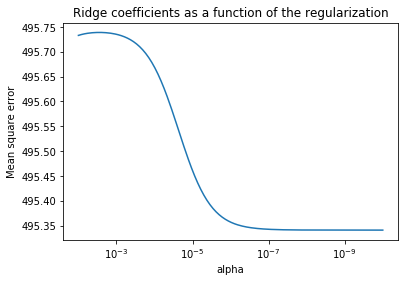

In [216]:
# Visualization for Ridge
n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

mse_list = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(train_X, train_y)
    ridge_pred = ridge.predict(test_X)
    mse = mean_squared_error(test_y, ridge_pred)
    mse_list.append(mse)

ax = plt.gca()

ax.plot(alphas, mse_list)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('Mean square error')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight');

In [157]:
# Cross Validation for Lasso
n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

lasso_cv = LassoCV(cv=5, alphas=alphas, 
                   fit_intercept=True, random_state=0).fit(train_X, train_y)
lasso_cv_pred = lasso_cv.predict(test_X)

print('MSE for Lasso with cross validation: {:.5f}'.format(mean_squared_error(test_y, lasso_cv_pred)))
print('R^2 for Lasso with cross validation: {:.5f}'.format(lasso_cv.score(test_X, test_y)))
print('Best alpha for Lasso with cross validation: {}'.format(lasso_cv.alpha_))

MSE for Lasso with cross validation: 487.98681
R^2 for Lasso with cross validation: -0.00552
Best alpha for Lasso with cross validation: 0.01


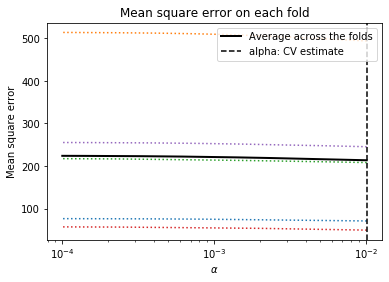

In [169]:
# Visualization for LassoCV
EPSILON = 1e-4

plt.figure()
plt.semilogx(lasso_cv.alphas_ + EPSILON, lasso_cv.mse_path_, ':')
plt.plot(lasso_cv.alphas_ + EPSILON, lasso_cv.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(lasso_cv.alpha_ + EPSILON, linestyle='--', color='k',
            label='alpha: CV estimate')

plt.legend()
plt.xlabel(r'$\alpha$')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold')
plt.axis('tight');

In [159]:
# filter out features with non-zero coefficient based on Lasso
coefs = lasso_cv.coef_
features = train_X.columns
coef_df = pd.DataFrame(coefs, features, columns=['coefficient'])
coef_df[(coef_df != 0).any(axis=1)]
# coef_df[(coef_df != 0).any(axis=1)].to_csv('lasso_cv_coef.csv')

,0
美食,-2.359495e-01
美食制作,-3.822214e-01
生活,-2.192580e-01
美食圈,-5.074607e-01
日常,1.683878e-02
吃货,5.339244e-01
美食侦探,-8.313820e-02
美食vlog,-3.449855e-01
吃播,-1.870997e-01
美食测评,-2.216382e-01
